In [1]:
# Import Dependencies
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import cm

In [2]:
# Grab the data files!
# Country code
excelpath1 = os.path.join('Country_code.xlsx')
CountryCodeISO_df = pd.read_excel(excelpath1)
CountryCodeISO_df.head(3)

# CITES source
CitesSource_df = pd.read_excel('CITES_Source.xlsx') 
print(CitesSource_df.columns.get_values())
CitesSource_df.head(3)

# CITES purpose
CitesPurpose_df = pd.read_excel('CITES_Purpose.xlsx') 
print(CitesPurpose_df.columns.get_values())
CitesPurpose_df.head(3)
#CITES data to analyze
csvpath = os.path.join('WildLifeTrade2016-2017.csv')
CITES_data_df = pd.read_csv(csvpath)
CITES_data_df.head(1)

#Output files
ImporterFile = 'TopImpByTrans_JRE.csv'
ExporterFile = 'TopExpByTrans_JRE.csv'
ImpQtyFile = 'TopImpByQuantity_JRE.csv'
ExpQtyFile = 'TopExpByQuantity_JRE.csv'

['Source Code' 'Source Description']
['Purpose Code' 'Purpose Description']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67400 entries, 0 to 67399
Data columns (total 16 columns):
Year                          67400 non-null int64
App.                          67400 non-null object
Taxon                         67400 non-null object
Class                         47061 non-null object
Order                         67343 non-null object
Family                        66939 non-null object
Genus                         65941 non-null object
Importer                      67329 non-null object
Exporter                      66822 non-null object
Origin                        25667 non-null object
Importer reported quantity    31900 non-null float64
Exporter reported quantity    44226 non-null float64
Term                          67400 non-null object
Unit                          6449 non-null object
Purpose                       61339 non-null object
Source                        66853 non-null object
dtypes: float64(2), int64(1), object(13)
memory usage: 8.2+

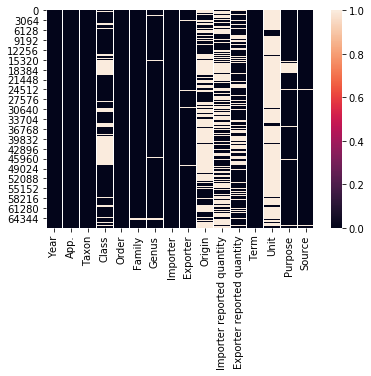

In [3]:
#Visualize initial data
CITES_data_df.info()
sns.heatmap(CITES_data_df.isnull())
plt.show()

In [4]:
# Add the CITES Purpose description
temp_df1 = pd.merge(CITES_data_df, CitesPurpose_df, 
                    left_on=  ['Purpose'],
                   right_on= ['Purpose Code'], 
                   how = 'inner')

#print(temp_df1.columns.get_values())
# drop the purpose code column
del temp_df1['Purpose Code']
print(temp_df1.columns.get_values())
temp_df1.head(3)

# Add the CITES Source description
temp_df2 = pd.merge(temp_df1, CitesSource_df, 
                    left_on=  ['Source'],
                   right_on= ['Source Code'], 
                   how = 'inner')
#print(temp_df2.columns.get_values())
# drop the Source code column
del temp_df2['Source Code']
print(temp_df2.columns.get_values())
temp_df2.head(3)

# Add the Importer Country description
temp_df3 = pd.merge(temp_df2, CountryCodeISO_df,
                    left_on=  ['Importer'],
                    right_on= ['Country Code'], 
                    how = 'inner')
print(temp_df3.columns.get_values())
# drop the Country code column
del temp_df3['Country Code']
temp_df3 = temp_df3.rename(columns={'Country Name':'Importer Country Name'})
print(temp_df3.columns.get_values())
temp_df3.head(3)



# Add the Exporter Country description
temp_df4 = pd.merge(temp_df3, CountryCodeISO_df,
                    left_on=  ['Exporter'],
                    right_on= ['Country Code'], 
                    how = 'inner')
#print(temp_df4.columns.get_values())
# drop the Country code column
del temp_df4['Country Code']
temp_df4 = temp_df4.rename(columns={'Country Name':'Exporter Country Name'})
print(temp_df4.columns.get_values())
temp_df4.head(2)

['Year' 'App.' 'Taxon' 'Class' 'Order' 'Family' 'Genus' 'Importer'
 'Exporter' 'Origin' 'Importer reported quantity'
 'Exporter reported quantity' 'Term' 'Unit' 'Purpose' 'Source'
 'Purpose Description']
['Year' 'App.' 'Taxon' 'Class' 'Order' 'Family' 'Genus' 'Importer'
 'Exporter' 'Origin' 'Importer reported quantity'
 'Exporter reported quantity' 'Term' 'Unit' 'Purpose' 'Source'
 'Purpose Description' 'Source Description']
['Year' 'App.' 'Taxon' 'Class' 'Order' 'Family' 'Genus' 'Importer'
 'Exporter' 'Origin' 'Importer reported quantity'
 'Exporter reported quantity' 'Term' 'Unit' 'Purpose' 'Source'
 'Purpose Description' 'Source Description' 'Country Name' 'Country Code']
['Year' 'App.' 'Taxon' 'Class' 'Order' 'Family' 'Genus' 'Importer'
 'Exporter' 'Origin' 'Importer reported quantity'
 'Exporter reported quantity' 'Term' 'Unit' 'Purpose' 'Source'
 'Purpose Description' 'Source Description' 'Importer Country Name']
['Year' 'App.' 'Taxon' 'Class' 'Order' 'Family' 'Genus' 'Importer'


Year App.            Taxon     Class          Order        Family  \
0  2016    I   Aquila heliaca      Aves  Falconiformes  Accipitridae   
1  2016    I  Panthera tigris  Mammalia      Carnivora       Felidae   

      Genus Importer Exporter Origin  Importer reported quantity  \
0    Aquila       TR       NL     CZ                         NaN   
1  Panthera       TR       NL     HU                         NaN   

   Exporter reported quantity    Term Unit Purpose Source Purpose Description  \
0                         1.0  bodies  NaN       T      C          Commercial   
1                         1.0  bodies  NaN       T      C          Commercial   

                                  Source Description Importer Country Name  \
0  Animals bred in captivity in accordance with R...                Turkey   
1  Animals bred in captivity in accordance with R...                Turkey   

  Exporter Country Name  
0           Netherlands  
1           Netherlands

In [5]:
#######################################################
#Here is the block for data cleaning that you can plut into your code
#The final dataframe is deduped_df

tobecleaned_df =[]
dropnacolumns_df=[]
deduped_df=[]

tobecleaned_df = temp_df4.copy()
tobecleaned_df.shape #totally 60627 rows

#drop columns with all NA values
dropnacolumns_df=tobecleaned_df.dropna(axis=1, how='all')
#len(dropnacolumns_df.columns) #20 column
#len(tobecleaned_df.columns) #20 columns

#remove deduplicates
deduped_df=dropnacolumns_df.drop_duplicates()
deduped_df.shape #removed 3 duplicate rows

#remove column with 89.67% null values
try:
    del deduped_df['Unit'] # This should be run only once, second time will fail since column no longer exist
    #deduped_df.head(1)
except:
    print('column was already removed')

#removed unneeded dataset: the plant (Source is 'A')
#deduped_df.drop(deduped_df[deduped_df.Source=='A'].index, inplace=True)
deduped_df=deduped_df.drop(deduped_df[deduped_df.Source=='A'].index)
deduped_df.shape #49376, 19

#drop the row with 0 quality
deduped_df=deduped_df.drop(deduped_df[deduped_df['Importer reported quantity']==0].index)
#deduped_df.shape
#deduped_df.columns.values
#######################################################

In [6]:
columnsnames= list(deduped_df.columns.values)
nulldict={}
for col in columnsnames:
    deduped_df[col].isnull().sum()
    nulldict[col]=deduped_df[col].isnull().sum()/deduped_df[col].count()*100
    
nulldict    

{'App.': 0.0,
 'Class': 7.3883161512027495,
 'Exporter': 1.1616948041304704,
 'Exporter Country Name': 0.0,
 'Exporter reported quantity': 52.67942731686199,
 'Family': 0.84351129447326501,
 'Genus': 2.0756238241921814,
 'Importer': 0.081078341947907168,
 'Importer Country Name': 0.0,
 'Importer reported quantity': 99.092741935483872,
 'Order': 0.026336047972124306,
 'Origin': 103.11407297708668,
 'Purpose': 0.0,
 'Purpose Description': 0.0,
 'Source': 0.0,
 'Source Description': 0.0,
 'Taxon': 0.0,
 'Term': 0.0,
 'Year': 0.0}

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49375 entries, 0 to 60626
Data columns (total 19 columns):
Year                          49375 non-null int64
App.                          49375 non-null object
Taxon                         49375 non-null object
Class                         45978 non-null object
Order                         49362 non-null object
Family                        48962 non-null object
Genus                         48371 non-null object
Importer                      49335 non-null object
Exporter                      48808 non-null object
Origin                        48813 non-null object
Importer reported quantity    24800 non-null float64
Exporter reported quantity    32339 non-null float64
Term                          49375 non-null object
Purpose                       49375 non-null object
Source                        49375 non-null object
Purpose Description           49375 non-null object
Source Description            49375 non-null object
Import

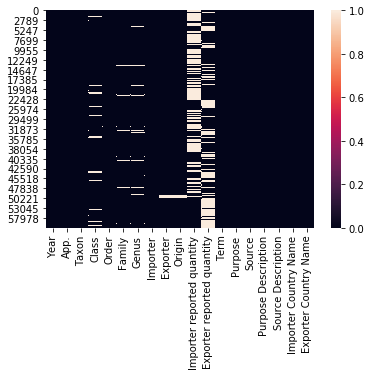

In [7]:
#Replace empty origin column for export values
#deduped_df.loc[deduped_df["Origin"].isnull(),'Origin'] = deduped_df["Exporter"]
#fill blanks with values -- column 'Origin' has 72.05% 
#after this step, only has 562 rows with null value
deduped_df['Origin'].fillna(deduped_df['Exporter'], inplace=True)
#Visualize data
deduped_df.info()
sns.heatmap(deduped_df.isnull())
plt.show()

In [8]:
deduped_df['Importer'].isnull().value_counts()

False    49335
True        40
Name: Importer, dtype: int64

In [9]:
deduped_df['Exporter'].isnull().value_counts()

False    48808
True       567
Name: Exporter, dtype: int64

In [10]:
deduped_df['Origin'].isnull().value_counts()

False    48813
True       562
Name: Origin, dtype: int64

In [11]:
# Group by Importing country
# Using GroupBy in order to summarize the data by 'Importer Country Name' values
GrpdByImporterData = deduped_df.groupby(['Importer Country Name'])

# Transaction count
ImportTransactionCount = deduped_df['Importer Country Name'].value_counts()

# Construct the output table
# In order to be visualized, a data function must be used...
TopImporter_df = pd.DataFrame({'Transaction Count': ImportTransactionCount})
# convert the index into a column
TopImporter_df.sort_values("Transaction Count", inplace=True, ascending=False)
TopImporter_df.reset_index(inplace=True)
TopImporter_df = TopImporter_df.rename(columns = {'index' : 'Import Country'})
TopImporter_df.to_csv(ImporterFile, encoding='utf-8', index=False)
TopImporter_df.head(5)

Import Country  Transaction Count
0  United States of America               8547
1                     Japan               3054
2      Hong Kong, SAR China               1942
3                     China               1939
4                   Germany               1844

In [12]:
# Group by Exporting Countries
# Using GroupBy in order to summarize the data by 'Importer Country Name' values
GrpdByExporterData = deduped_df.groupby(['Exporter Country Name'])

# Transaction count
ExportTransactionCount = deduped_df['Exporter Country Name'].value_counts()

# Construct the output table
# In order to be visualized, a data function must be used...
TopExporter_df = pd.DataFrame({'Transaction Count': ExportTransactionCount})
# convert the index into a column
TopExporter_df.sort_values("Transaction Count", inplace=True, ascending=False)
TopExporter_df.reset_index(inplace=True)
TopExporter_df = TopExporter_df.rename(columns = {'index' : 'Export Country'})
TopExporter_df.to_csv(ExporterFile, encoding='utf-8', index=False)
TopExporter_df.head(5)

Export Country  Transaction Count
0                 Indonesia               6443
1                     Italy               4996
2  United States of America               4015
3                    France               3442
4                   Germany               2288

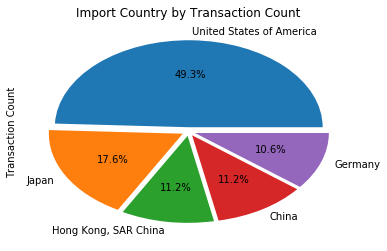

In [13]:
# Top Importer by Importer reported quantities

# Using GroupBy in order to summarize the data by 'Importer Country Name' values
GrpdByImpQtyData = deduped_df.groupby(['Importer Country Name'])

# Transaction count
ImportTransCount = deduped_df['Importer Country Name'].value_counts()
ImportRptdQuantity = GrpdByImpQtyData['Importer reported quantity'].sum()
# Construct the output table
# In order to be visualized, a data function must be used...
TopImpQty_df = pd.DataFrame({'Transaction Count': ImportTransCount,
                            'Quantity Imported': ImportRptdQuantity })

# sort and convert the index into a column
TopImpQty_df.sort_values("Transaction Count", inplace=True, ascending=False)
TopImpQty_df.reset_index(inplace=True)
TopImpQty_df = TopImpQty_df.rename(columns = {'index' : 'Import Country'})
TopImpQty_df.to_csv(ImpQtyFile, encoding='utf-8', index=False)
TopImpQty_df2 = TopImpQty_df.head(5)

# Labels for the sections of our pie chart
ImpLabels = TopImpQty_df2['Import Country']
PieTitle = 'Import Country by Transaction Count'

IBT = TopImpQty_df2['Transaction Count']
IC = TopImpQty_df2['Import Country']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
ImpTransPie = IBT.plot(kind = 'pie', y = IC, title = PieTitle,
                     autopct="%1.1f%%", explode = explode,
                     colors = None, shadow=False, startangle=0, labels = ImpLabels)
# "%1.1f%%"
#                      autopct="%1.f%%", explode = None, labels = ImpLabels,

plt.show()


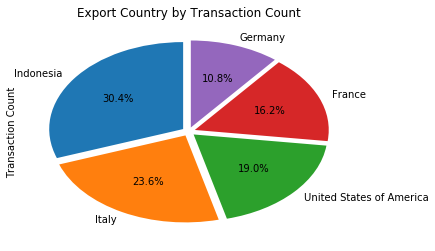

In [14]:
# Top Importer by Exporter reported quantities

# Using GroupBy in order to summarize the data by 'Importer Country Name' values
GrpdByExpQtyData = deduped_df.groupby(['Exporter Country Name'])

# Transaction count
ExportTransCount = deduped_df['Exporter Country Name'].value_counts()
ExportRptdQuantity = GrpdByExpQtyData['Exporter reported quantity'].sum()
# Construct the output table
# In order to be visualized, a data function must be used...
TopExpQty_df = pd.DataFrame({'Transaction Count': ExportTransCount,
                            'Quantity Exported': ExportRptdQuantity })

# convert the index into a column
TopExpQty_df.sort_values("Transaction Count", inplace=True, ascending=False)
TopExpQty_df.reset_index(inplace=True)
TopExpQty_df = TopExpQty_df.rename(columns = {'index' : 'Export Country'})
TopExpQty_df.to_csv(ExpQtyFile, encoding='utf-8', index=False)
TopExpQty_df2 = TopExpQty_df.head(5)
PieTitle = 'Export Country by Transaction Count'
ExpLabels = TopExpQty_df2['Export Country']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
EBT = TopExpQty_df2['Transaction Count']
EC = TopExpQty_df2['Export Country']
ExpTransPie = EBT.plot(kind = 'pie', y = EC, title = PieTitle,
                     autopct="%1.1f%%", explode = explode, labels = ExpLabels,
                     colors = None, shadow=False, startangle=90)

plt.show()



In [16]:
column_search_ie = input("Please specify search term for Importer/Exporter/Origin top 10: ")
top_10_region = pd.DataFrame(deduped_df[column_search_ie].value_counts().head(10))
top_10_region['Region'] = top_10_region.index
top_10_region.index = range(10)
top_10_region

Please specify search term for Importer/Exporter/Origin top 10: Importer


Importer Region
0      8547     US
1      3054     JP
2      1942     HK
3      1939     CN
4      1844     DE
5      1733     FR
6      1610     CH
7      1250     CA
8      1217     AE
9      1172     SG

In [17]:
taxon_trade_groups = deduped_df.groupby(['App.','Taxon'])['Taxon'].value_counts()
appendices_by_taxon = taxon_trade_groups.groupby(level=0).count()
print('Total traded appendices: %s' %(appendices_by_taxon).sum())
appendices_by_taxon
#list(appendices_by_taxon)

Total traded appendices: 2915


App.
I       513
II     2275
III      89
N        38
Name: Taxon, dtype: int64

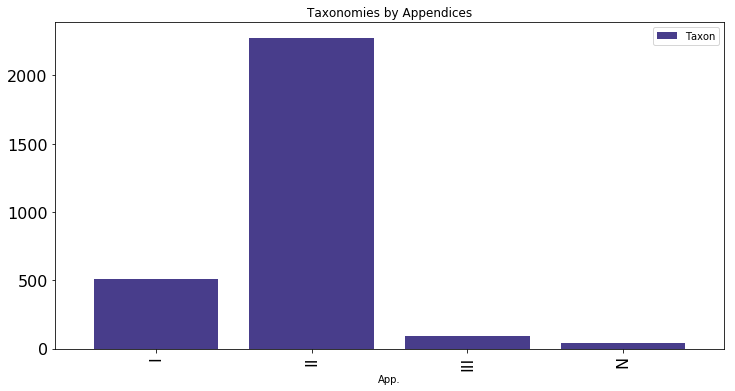

In [18]:
kwargs_figs = {'figsize': (12, 6), 'fontsize': 16, 'facecolor':'darkslateblue', 'alpha':1, 'align':'center', 'width':0.8}
appendices_by_taxon.plot.bar(**kwargs_figs , title ='Taxonomies by Appendices')
plt.legend()
plt.show()

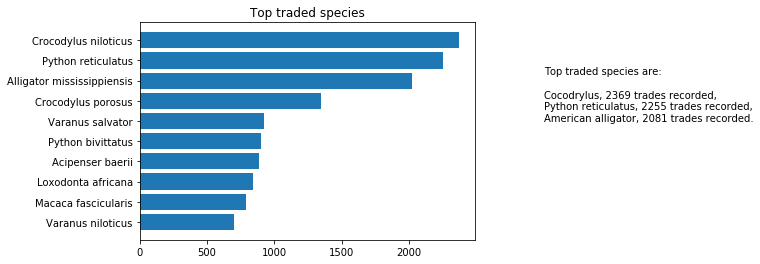

In [19]:
def plot_labels(series):
    labels = [idx for idx in series.index]
    values = [value for value in series.values]
    index = [x for x in range(len(series))]
    return labels,values,index

top_taxon = taxon_trade_groups.groupby(level=1).sum().sort_values(ascending = False).head(10)
top_taxon
fig,ax = plt.subplots()
labels,values,index = plot_labels(top_taxon.sort_values())
ax.barh(index,values)
plt.yticks(index,labels)
ax.set_title('Top traded species')
comments = 'Top traded species are:\n'\
            '\n'\
            'Cocodrylus, 2369 trades recorded,\n'\
            'Python reticulatus, 2255 trades recorded,\n'\
            'American alligator, 2081 trades recorded.'
ax.text(3000,5,comments)
plt.show()

In [20]:
#top_taxon
app_taxon= deduped_df.loc[:, ['Taxon','App.', 'Origin']]
app_taxon2=app_taxon.set_index('Taxon')
a = app_taxon2.loc[['Crocodylus niloticus','Python reticulatus','Alligator mississippiensis','Crocodylus porosus', 'Varanus salvator', 'Python bivittatus','Acipenser baerii', 'Loxodonta africana', 'Macaca fascicularis', 'Varanus niloticus'],:]
a['App.'].value_counts()
#a['App.'].value_counts().sum()

pd.DataFrame(a['App.'].value_counts().head(10))

App.
II  12298
I     728

Please add your seach term among the following list:['Year', 'App.', 'Taxon', 'Class', 'Order', 'Family', 'Genus', 'Importer', 'Exporter', 'Origin', 'Importer reported quantity', 'Exporter reported quantity', 'Term', 'Purpose', 'Source', 'Purpose Description', 'Source Description', 'Importer Country Name', 'Exporter Country Name'] Class


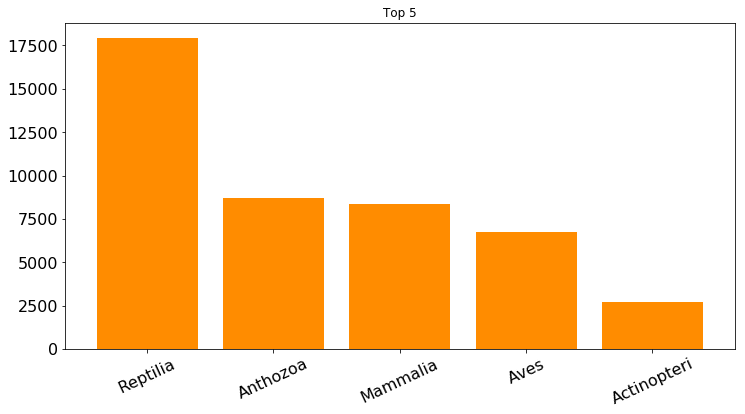

In [22]:
#TOP 5 Data counts
kwargs_figs = {'figsize': (12, 6), 'fontsize': 16, 'facecolor':'darkorange', 'alpha':1, 'align':'center', 'width':0.8}
column_list = list(columnsnames)
search_term = input('Please add your seach term among the following list:%s '%(column_list))
search_list = deduped_df[search_term].value_counts().head(5)
#print(search_list)
search_list.plot.bar(**kwargs_figs, title ='Top 5')
plt.xticks(rotation=25)
plt.show()

In [23]:
search_list

Reptilia       17908
Anthozoa        8684
Mammalia        8370
Aves            6742
Actinopteri     2684
Name: Class, dtype: int64

In [24]:
#Count by 3 variables
print('These are the possible variables you can use for the search: Class, Family, Genus, Order, App.')

z = input('Specify your first input; this is going to serve as the index')

if z == 'Class':
    print(list(deduped_df['Class'].unique()))
elif z== 'Family':
    print(list(deduped_df['Family'].unique()))
elif z== 'Genus':
    print(list(deduped_df['Genus'].unique()))
elif z== 'Order':
    print(list(deduped_df['Order'].unique()))
elif z== 'Taxon':
    print(list(deduped_df['Order'].unique()))
elif z== 'App.':
    print(list(deduped_df['App.'].unique()))
else:
    print("Oops, that's not in the list, try again")


x = input('Specify from the list above what do you want to search for: ')

y = input('Specify your 2nd variable from the following list: %s' %(columnsnames)) 

print('-----Your search was: Look inside %s, %s. vs %s.-----'%(z,x,y))

wtrade_df = deduped_df.set_index(z)

wtrade_loc_df=wtrade_df.loc[x,y].value_counts().head(10)
pd.DataFrame(wtrade_loc_df)

These are the possible variables you can use for the search: Class, Family, Genus, Order, App.
Specify your first input; this is going to serve as the indexClass
['Aves', 'Mammalia', 'Reptilia', 'Actinopteri', 'Amphibia', 'Anthozoa', nan, 'Bivalvia', 'Arachnida', 'Hirudinoidea', 'Gastropoda', 'Insecta', 'Hydrozoa', 'Elasmobranchii', 'Holothuroidea', 'Dipneusti', 'Coelacanthi']
Specify from the list above what do you want to search for: Reptilia
Specify your 2nd variable from the following list: ['Year', 'App.', 'Taxon', 'Class', 'Order', 'Family', 'Genus', 'Importer', 'Exporter', 'Origin', 'Importer reported quantity', 'Exporter reported quantity', 'Term', 'Purpose', 'Source', 'Purpose Description', 'Source Description', 'Importer Country Name', 'Exporter Country Name']Importer
-----Your search was: Look inside Class, Reptilia. vs Importer.-----


Importer
US      2601
JP      1318
HK      1047
CN       815
FR       744
CH       716
IT       628
KR       593
SG       509
DE       488

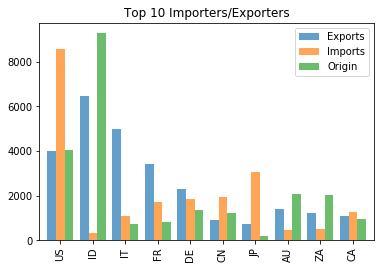

In [25]:
wtrade_df2 = deduped_df
(pd.DataFrame()
     .assign(Imports=wtrade_df2.Importer.value_counts(), Exports=wtrade_df2.Exporter.value_counts(), Origin=wtrade_df2.Origin.value_counts())
     .pipe(lambda df: df.loc[df.fillna(0).sum(axis='columns').sort_values(ascending=False).index])
     .head(10)
     .plot.bar(title="Top 10 Importers/Exporters", width= 0.8 , alpha = 0.7)
)

In [26]:
deduped_df['Source'].value_counts()

W    21437
C    15769
F     4565
I     2103
D     1761
O     1758
R     1737
U      241
X        4
Name: Source, dtype: int64

Text(0.5,1,'Most traded animal goods')

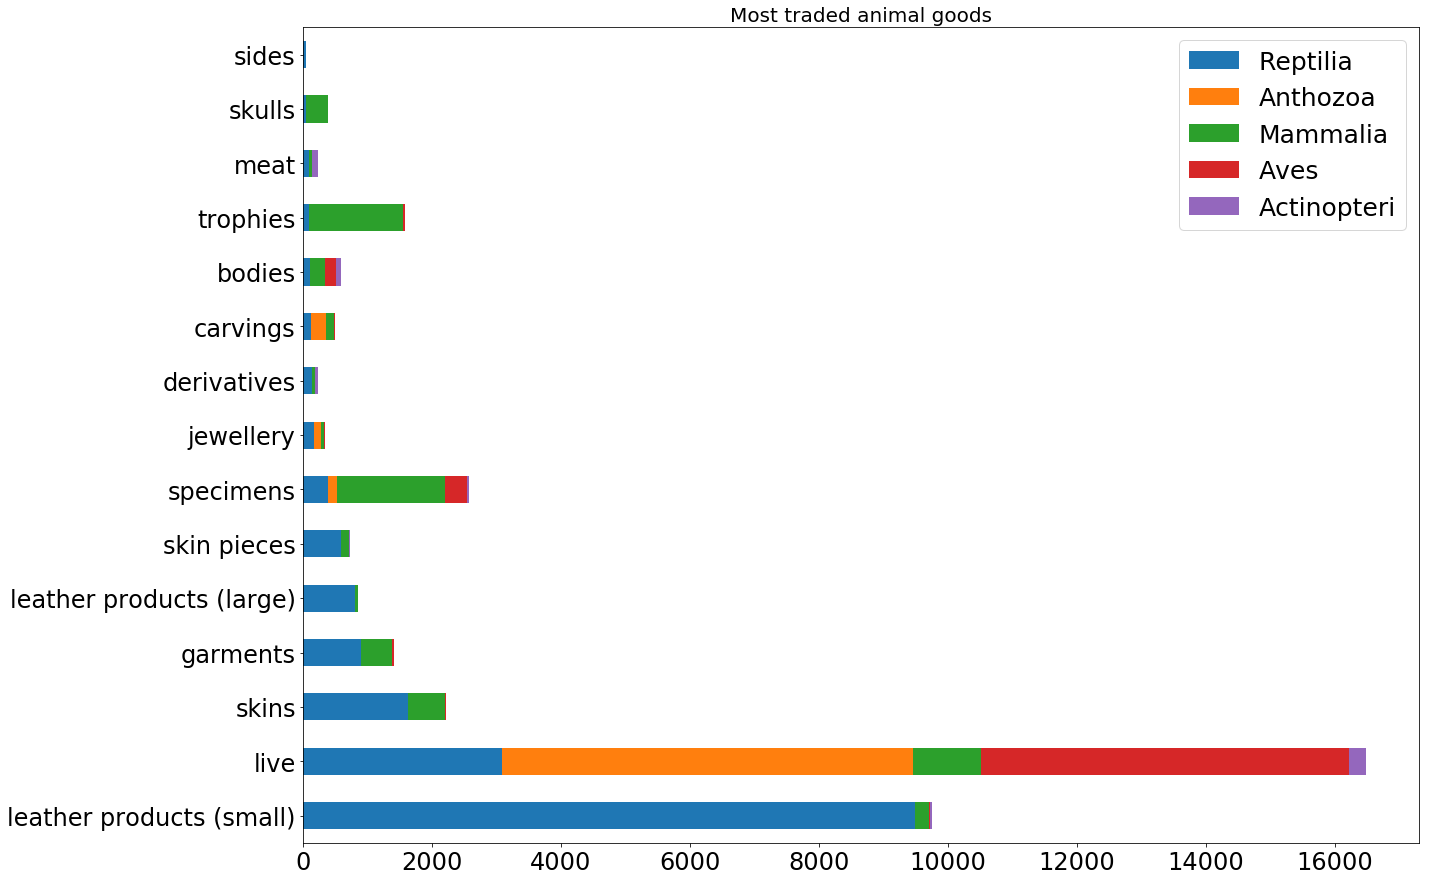

In [27]:

animal_classes = ['Reptilia','Anthozoa','Mammalia','Aves','Actinopteri']
bar_chart = pd.DataFrame()
for i in animal_classes:
    bar_chart[i] = deduped_df['Term'].loc[deduped_df['Class']==i].value_counts()
bar_chart.head(15).plot.barh(figsize=(20,15), fontsize=24, stacked=True)
plt.legend(fontsize=25)
plt.title('Most traded animal goods', fontsize=20)

In [28]:
bar_chart.head(15)

Reptilia  Anthozoa  Mammalia    Aves  Actinopteri
leather products (small)      9486       3.0     215.0    13.0         33.0
live                          3084    6377.0    1051.0  5706.0        254.0
skins                         1632       NaN     572.0    10.0         12.0
garments                       897       2.0     489.0    21.0          8.0
leather products (large)       812       1.0      40.0     NaN          5.0
skin pieces                    592       NaN     127.0     2.0          5.0
specimens                      388     136.0    1674.0   345.0         32.0
jewellery                      171     111.0      53.0     8.0          NaN
derivatives                    142       3.0      45.0     7.0         44.0
carvings                       122     233.0     128.0    13.0          NaN
bodies                         111       1.0     230.0   176.0         68.0
trophies                        95       NaN    1457.0    28.0          NaN
meat                            90       NaN      58.0     2.0         90.0
skulls                          53       NaN     337.0     2.0          NaN
sides                           50       NaN       2.0     NaN          NaN

Text(0.5,1,'Most traded purposes per class ')

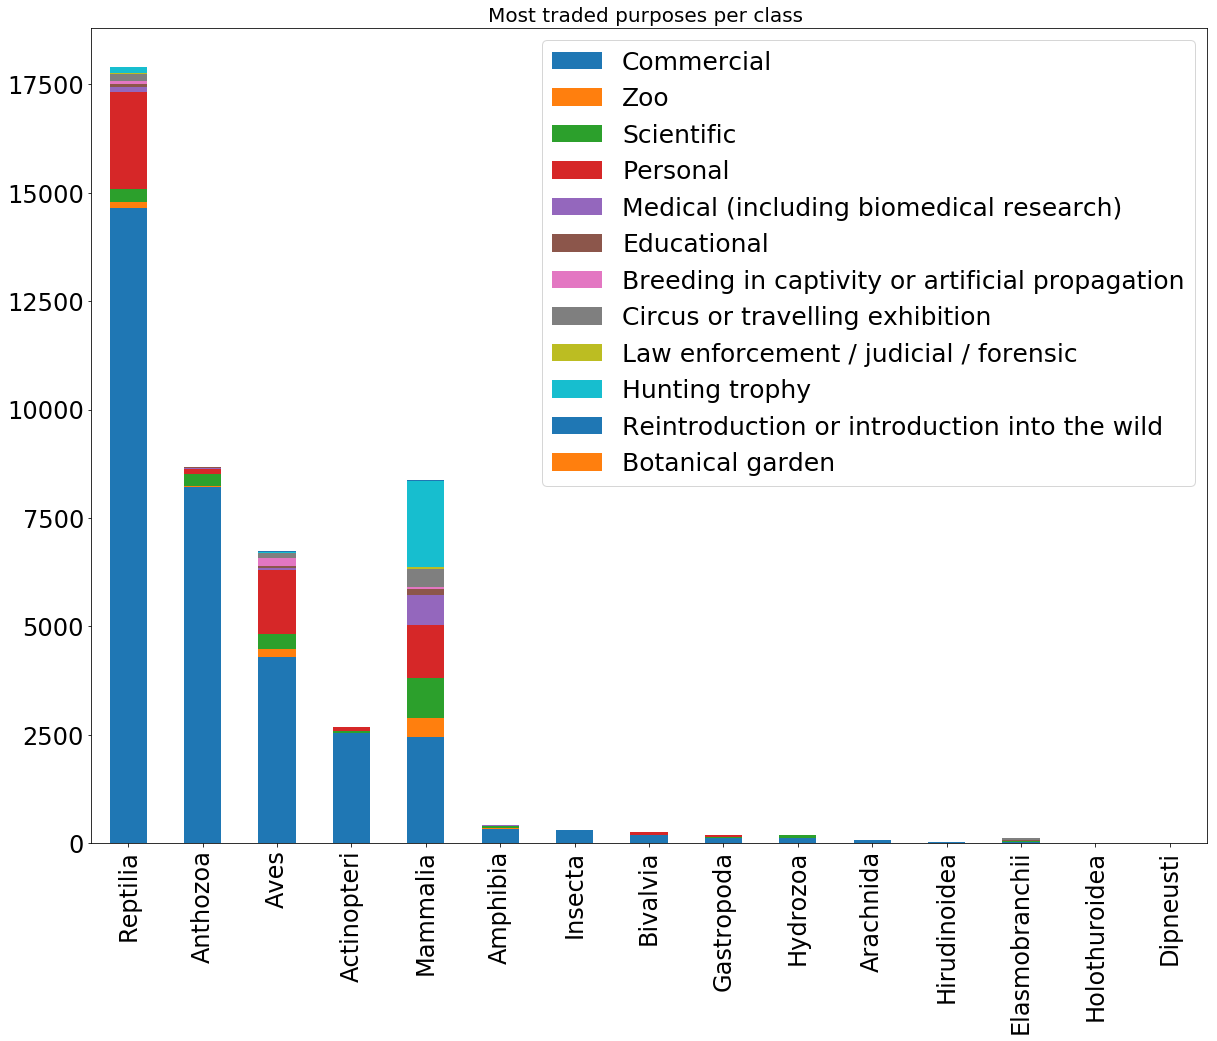

In [29]:
purpose_list = list(deduped_df['Purpose Description'].unique())
purpose_classes = purpose_list
bar_chart2 = pd.DataFrame()
for i in purpose_classes:
    bar_chart2[i] = deduped_df['Class'].loc[deduped_df['Purpose Description']==i].value_counts()
bar_chart2.head(15).plot.bar(figsize=(20,15), fontsize=24, stacked=True)
plt.legend(fontsize=25)
plt.title('Most traded purposes per class ', fontsize=20)

Specify the taxonomy of the species you want to look for:Crocodylus niloticus


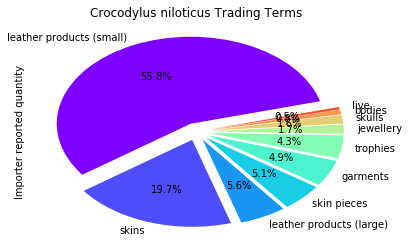

In [31]:
#Search trading terms for importers per species
#Specify top_x and species here:
x = 10
spec_species = input('Specify the taxonomy of the species you want to look for:')
#top 10
#Loxodonta africana, Cocodrylus niloticus

species = deduped_df[deduped_df['Taxon'] == spec_species]
importer_term = species.groupby('Term')['Importer reported quantity'].count().sort_values(ascending = False)
#species.head()

importer_term[:x]
#importer_term[:10]/importer_term[:10].sum()
#100*elephant_term/elephant_term.sum()

# Labels for the sections of our pie chart
PieTitle = '%s Trading Terms' %(spec_species)

importer_term_values = importer_term[:x]
IC = species['Term']
colors = cm.rainbow(np.arange(x)/x)
explode = [0]*(len(IBT)-6) + [0.1]*x
ImpTransPie = importer_term_values.plot(kind = 'pie', title = PieTitle,
                     autopct="%1.1f%%", explode = explode,
                     colors = colors, shadow=False, startangle=15)

In [32]:
#Show table of Top 5 importers of species terms
top_terms = species['Term'].value_counts().sort_values(ascending = False)
y = 5
top_y_terms = top_terms[:y]
top_y_terms_names = top_y_terms.index.tolist()

importer_terms_qty = species.loc[species['Term'].isin(top_y_terms_names)].groupby(['Importer Country Name','Term'])['Importer reported quantity'].sum().unstack()

top_importer_qty = importer_terms_qty.sort_values(by=top_y_terms_names[0],ascending = False).head(5).fillna(0)
top_importer_qty 

Term                      garments  leather products (large)  \
Importer Country Name                                          
Japan                         10.0                     21.00   
United States of America     828.0                    708.00   
Hong Kong, SAR China          10.0                      0.00   
France                         7.0                     24.83   
China                        207.0                    180.00   

Term                      leather products (small)  skin pieces         skins  
Importer Country Name                                                          
Japan                                     69994.50       3659.2  32575.000000  
United States of America                  21514.00       2601.0   1423.000000  
Hong Kong, SAR China                      11749.00        412.0   3371.000000  
France                                     6125.19          4.0  61691.000000  
China                                      5861.00          0.0  11806.683782

In [33]:
importer_terms_trades = species.loc[species['Term'].isin(top_y_terms_names)]\
                .groupby(['Importer Country Name','Term'])['Importer reported quantity'].count().unstack()

top_importer_trades = importer_terms_trades.sort_values(by=top_y_terms_names[0],ascending = False).head(5).fillna(0)
top_importer_trades

Term                      garments  leather products (large)  \
Importer Country Name                                          
United States of America      12.0                      25.0   
Japan                          4.0                       6.0   
France                         4.0                       9.0   
Hong Kong, SAR China           6.0                       0.0   
Italy                          4.0                       2.0   

Term                      leather products (small)  skin pieces  skins  
Importer Country Name                                                   
United States of America                     143.0         13.0   13.0  
Japan                                         77.0         10.0   25.0  
France                                        55.0          1.0   13.0  
Hong Kong, SAR China                          52.0          9.0   28.0  
Italy                                         50.0         13.0   18.0

In [34]:
species

Year App.                 Taxon     Class       Order        Family  \
5      2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
10     2016    I  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
12     2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
19     2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
26     2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
27     2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
84     2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
126    2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
182    2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
189    2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
192    2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
315    2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
352    2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
433    2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
480    2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
488    2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
557    2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
682    2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
894    2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
903    2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
1020   2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
1090   2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
1209   2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
1258   2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
1274   2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
1373   2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
1599   2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
1725   2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
1726   2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
1727   2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
...     ...  ...                   ...       ...         ...           ...   
58124  2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
58125  2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
58126  2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
58272  2016    I  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
58641  2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
58642  2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
58643  2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
58644  2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
58645  2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
58698  2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
58776  2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
58811  2016    I  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
58812  2016    I  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
58936  2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
58937  2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
58938  2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
58939  2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
58940  2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
58983  2016   II  Crocodylus niloticus  Reptilia  Crocodylia  Crocodylidae   
59272  2016   II  Crocodylus 

Text(0.5,1,'Most traded purposes per exporter country ')

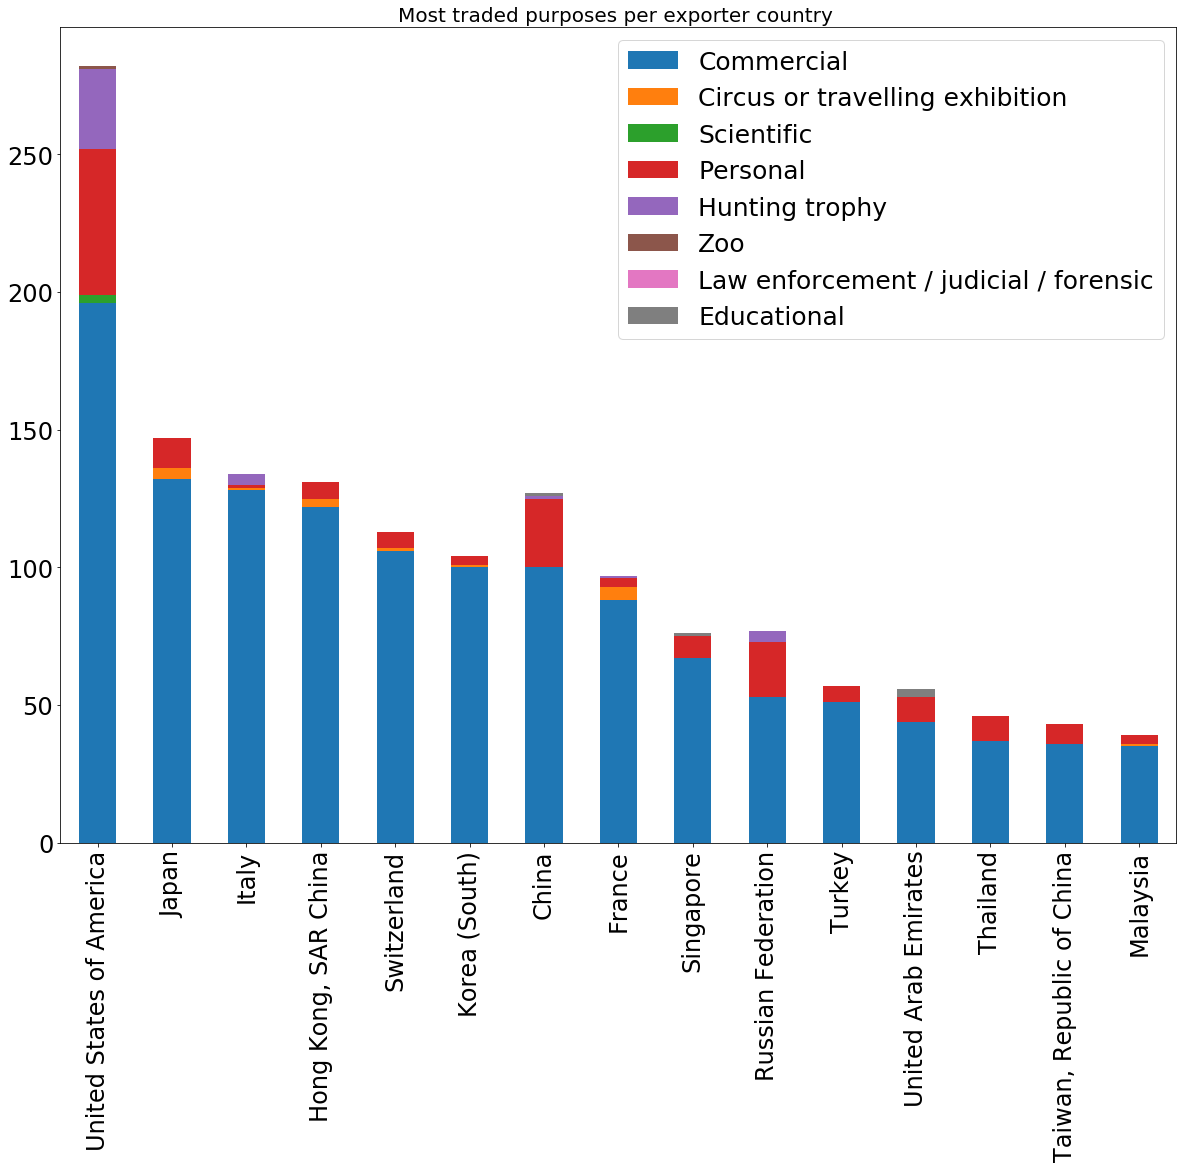

In [35]:
purpose_list = list(species['Purpose Description'].unique())
purpose_classes = purpose_list
bar_chart2 = pd.DataFrame()
for i in purpose_classes:
    bar_chart2[i] = species['Importer Country Name'].loc[species['Purpose Description']==i].value_counts()
bar_chart2.head(15).plot.bar(figsize=(20,15), fontsize=24, stacked=True)
plt.legend(fontsize=25)
plt.title('Most traded purposes per exporter country ', fontsize=20)

Specify the class of the species you want to look for:Reptilia


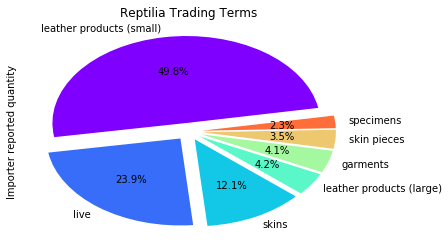

In [36]:
#Search trading classes for importers per species
#Specify top_x and species here:
x = 7
spec_species2 = input('Specify the class of the species you want to look for:')
#top 10
#Loxodonta_africana, Cocodrylus niloticus

species2 = deduped_df[deduped_df['Class'] == spec_species2]
importer_term2 = species2.groupby('Term')['Importer reported quantity'].count().sort_values(ascending = False)
#species.head()

importer_term2[:x]
#importer_term[:10]/importer_term[:10].sum()
#100*elephant_term/elephant_term.sum()

# Labels for the sections of our pie chart
PieTitle = '%s Trading Terms' %(spec_species2)

importer_term2_values = importer_term2[:x]
IC = species['Term']
colors = cm.rainbow(np.arange(x)/x)
explode = [0]*(len(IBT)-6) + [0.1]*x
ImpTransPie = importer_term2_values.plot(kind = 'pie', title = PieTitle,
                     autopct="%1.1f%%", explode = explode, colors = colors,
                     shadow=False, startangle=10)

Text(0.5,1,'Most traded purposes per exporter country ')

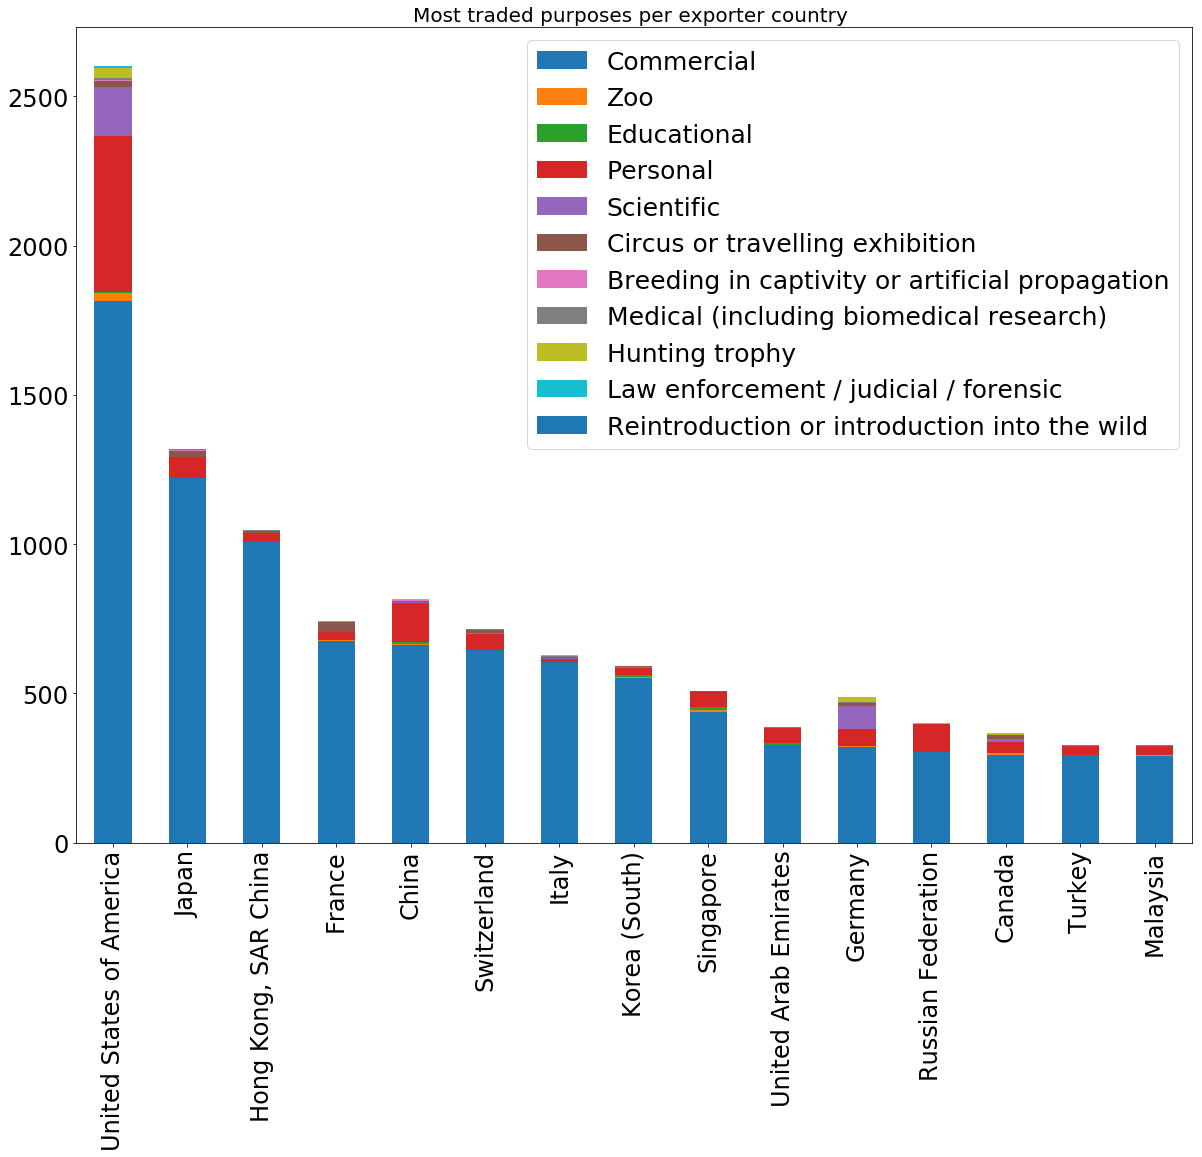

In [39]:
purpose_list = list(species2['Purpose Description'].unique())
purpose_classes = purpose_list
bar_chart2 = pd.DataFrame()
for i in purpose_classes:
    bar_chart2[i] = species2['Importer Country Name'].loc[species2['Purpose Description']==i].value_counts()
bar_chart2.head(15).plot.bar(figsize=(20,15), fontsize=24, stacked=True)
plt.legend(fontsize=25)
plt.title('Most traded purposes per exporter country ', fontsize=20)

In [40]:
csvpathx = os.path.join('GDP_Reptilia.csv')
GPDRep_df = pd.read_csv(csvpathx)
GPDRep_df.head(10)


Year  GDP per Capita  Imported transactions  Exported Transactions  \
0  2007       47954.532                   1661                    737   
1  2008       48302.283                   1704                    836   
2  2009       46909.422                   1672                    816   
3  2010       48310.335                   1621                    764   
4  2011       49733.884                   1612                    780   
5  2012       51403.389                   1717                    693   
6  2013       52741.728                   1711                    568   
7  2014       54668.078                   1574                    483   
8  2015       56436.714                   1403                    477   
9  2016       57607.613                   1345                    392   

   Reptilia leather qty imported   Reptilia leather qty exported   
0                     970,038.00                       62,998.00   
1                   1,149,114.50                       52,923.00   
2                     724,067.00                       59,469.00   
3                   1,212,924.75                       44,043.00   
4                   1,276,268.01                       42,176.00   
5                   1,295,917.00                       32,023.00   
6                   1,242,881.66                       35,085.00   
7                   1,085,927.50                       31,204.00   
8                   1,169,936.64                       35,900.00   
9                     908,050.88                       30,707.00

In [41]:
excelpathy = os.path.join('imf-gdp-per-capita.xlsx')
GDP0717_df = pd.read_excel(excelpathy)
top20_GDP = GDP0717_df.head(20)
top20_GDP

Country GDP per capita (USD)     2007     2008     2009     2010     2011  \
0                         Qatar   117000   104116   111364   127226   145724   
1                     Macao SAR  70345.7  72660.7  75151.7  93528.2   115105   
2                    Luxembourg  92837.1  91976.5  86893.4  90661.7  92969.9   
3             Brunei Darussalam    76560  79577.6  77667.2  79302.8  82567.7   
4                     Singapore    64466  63438.3  61646.8    70647  75013.2   
5                        Kuwait  66421.8  68553.2  63392.3  60946.6  67132.6   
6                        Norway  61898.5  62489.8  61230.8  61520.2  62571.3   
7          United Arab Emirates  72575.8  58833.4  55314.7  56457.7  59502.3   
8                    San Marino  no data  81476.3  70749.1  67885.3  62327.4   
9                   Switzerland  51707.1  53234.6    51712    53267  54773.5   
10                United States  47954.5  48302.3  46909.4  48310.3  49733.9   
11                Hong Kong SAR  43143.1  44760.9  43787.4  46948.2    49819   
12                 Saudi Arabia    43051  45109.2  43056.8  44163.1  48288.1   
13            Equatorial Guinea  43453.8  50732.3  50363.4    45141  47719.5   
14                  Netherlands  44065.7  45519.9  43910.9  44839.5    46309   
15                      Ireland  45908.7  44261.1  42223.9  43292.6  45361.1   
16                         Oman  39600.2  42761.9    44174  46828.1  45561.2   
17                      Austria  41255.6  42580.4  41175.2  42382.6  44326.5   
18                      Bahrain  40151.1  40852.1  39632.6  39952.7  42962.6   
19                    Australia  39427.9  40373.1  40647.5  41511.9  42810.8   

       2012     2013     2014     2015     2016     2017        Average  \
0    146872   142543   136410   129805   125160   124927  128286.191636   
1    122619   132739   127476  99448.8  98855.6   114430  102032.799545   
2   92102.2  95130.8  99924.2   102570   105741   109192   96363.574000   
3   83492.2  81729.5  79987.5  79504.2  77422.3  76743.1   79504.922273   
4   77429.5  81287.2  84597.1    86139  87832.3  90531.4   76638.891091   
5   71743.5  71183.6  70933.8  71191.4  71877.8  69669.5   68458.734455   
6   64629.5  65572.1  67236.2  68410.3  69406.9  70590.2   65050.523364   
7   61836.7  64537.2  65877.3  67127.5  68092.3  68245.5   63490.943818   
8   58378.7  57564.6  57704.2  58164.6  59042.6    60359   63365.181600   
9   55733.4  57104.2  58814.4  59429.6  60374.5  61359.9   56137.288909   
10  51403.4  52741.7  54668.1  56436.7  57607.6  59495.3   52142.119455   
11  51156.8  53298.7  55431.2    56928  58376.5  61015.6   51333.221182   
12  50383.7  51166.9  52639.1  54956.2  55330.5  55262.7   49400.674727   
13  51187.2  48499.3  47700.6    42648  37984.9  34864.9   45481.350000   
14  46491.1  47015.3  48363.7  49780.3  51248.5  53581.7   47375.053909   
15  46059.6  47426.7    52142  65679.3  69275.8  72632.4   52205.758727   
16  46137.7  44802.2  45223.5  46854.7  46067.2  45464.2   44861.338000   
17  45275.8  45787.5  46543.6  47030.3  47725.7  49247.2   44848.223091   
18  44495.3  46728.3  48663.4  49607.2  50719.2  51845.5   45055.454636   
19    44361  45287.1  46682.4  47643.1  48712.3  49882.3   44303.584545   

         Median           STD  
0   127226.3950  13932.706455  
1    99448.8210  22398.937241  
2    92969.8860   6991.313328  
3    79504.1840   2334.995448  
4    77429.4720  10391.622402  
5    69669.4840   3646.674561  
6    64629.4920   3404.003531  
7    64537.2500   5504.400121  
8    59700.7745   7812.898141  
9    55733.3540   3493.798472  
10   51403.3890   4356.767158  
11   51156.8220   6197.406575  
12   50383.6760   4925.585936  
13   47700.6380   5330.724222  
14   46491.0770   3084.781435  
15   46059.6340  11311.444766  
16   45464.1550   2108.838920  
17   45275.8490   2724.409046  
18   44495.3300   4653.812409  
19   44361.0200   3618.709162